<div style="text-align: center; font-size: 2em; color: lightblue; font-weight: bold;"> Wellbeing at Trinity Christian College: A Machine Learning Analysis of Survey Data </div>

<span style="color: #4682B4; font-weight: bold;">1. Introductory paragraph</span>

Trinity Christian College is a small private liberal arts college in Palos Heights, Illinois known for its close knit community, strong academic programs, and faith and service. They invited students, faculty, and staff to take part in a voluntary study to aim to understand the overall wellbeing on Trinity's campus. The survey asked students about their mental health, disabilities, how involved they are in campus activities, and whether they participate in events. Faculty and staff answered another set of questions giving their perspectives on the overall wellbeing of the college community. With this we will be able to answer the question: **Which factors on campus  are linked to overall wellbeing in Trinity’s students, faculty, and staff?** This project will first give an overview of the people who took the survey and their basic demographics. It will look at how mental health and disabilities relate to wellbeing and it will examine how participating in campus activities influences overall wellbeing at Trinity. By looking at all these factors together we can better understand what helps students, faculty, and staff feel their best and succeed as individuals and as a community.

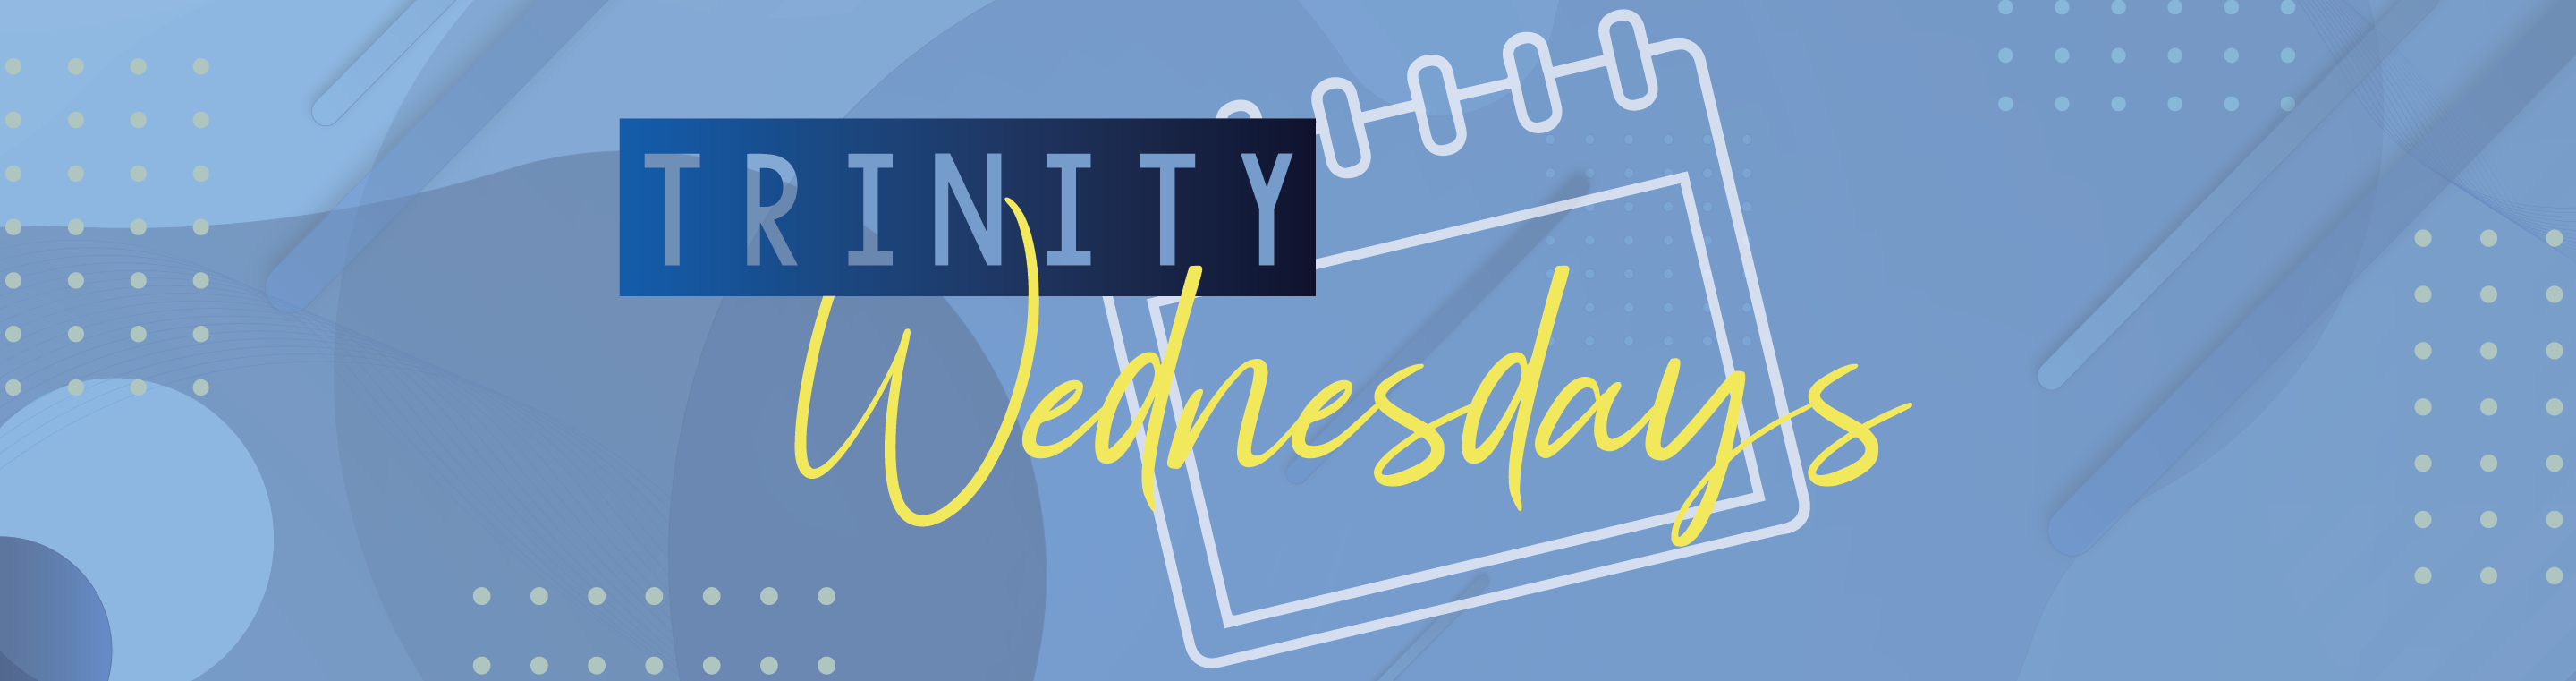

<span style="color: #4682B4; font-weight: bold;">2. Data source information</span>

The data for this study comes from surveys administered to students, faculty, and staff at Trinity Christian College by Dr. Jessica Clevering and her co-investigators. Participants voluntarily shared information about their demographics, wellbeing, participation in campus activities, and opinions about institutional wellbeing. The data collection process is considered reliable and trustworthy because it follows ethical guidelines under the supervision of the college’s Institutional Review Board which makes sure that all responses are anonymous and confidential. This helps protect participants and adds credibility to the dataset. For students, the dataset includes detailed demographic information, self-reported measures of wellbeing, and records of involvement in a variety of campus activities. For faculty and staff, it captures their perspectives on institutional wellbeing, including aspects related to campus culture, support, and engagement. Together, this information provides a broad and detailed view of the experiences and wellbeing of different groups within the college community. While the dataset is quantitative qualitative responses could offer insight into individual experiences and perceptions. The dataset overall contains the perfect information needed to study trends in wellbeing and engagement at Trinity Christian College. It allows for comparisons across students, faculty, and staff and provides a solid foundation for understanding how different groups experience and contribute to the wellbeing of the college community.

I added our dataset to the notebook and imported it using pandas read_csv() method so that we could view and work with the data.

In [31]:
import pandas as pd
data = pd.read_csv('TrinityWellbeingData.csv')
data

,"Informed Consent Information Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on institutional wellbeing. It will likely take about 15 minutes to complete the survey. The risks associated with this research are no greater than what you may encounter in everyday life. There are no anticipated personal benefits of participating in this research (other than the chance to win a Visa gift card). Participating in this research is completely voluntary. You may skip any questions. You will not be penalized in any way if you choose not to participate. Your participation in this research is anonymous. IP addresses will not be downloaded, and names will not be collected. If you choose to submit your name for the Visa gift card drawing, your name will not be connected to data. All data will be kept safe in password-protected institutional cloud drives. If you have any questions, you may contact Dr. Jessica Clevering at 708-239-3962 or Jessica.Clevering@trnty.edu. You may also contact Trinity Christian College’s human subjects review board at IRB@trnty.edu. By clicking the box below you acknowledge that you are at least 18 years old and have read and understood the information provided in this consent form.",How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,...,The college has structures and practices so as to be able to sustain itself.,The college has structures and practices that allow it to accomplish its goal.,Everyone is satisfied with the way things are in our college.,Everyone thinks that this college is a good community to be a part of.,Each person has a sense of belonging in the college.,There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.,Our college’s shared purpose or mission is clear to everyone.,Our college contributes to the world to make it a better place.,Everyone is needed for the college to fulfil its goals and purposes.,Our college is able to do more with everyone together than we could individually.
0,I know that being in this study is voluntary a...,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I know that being in this study is voluntary a...,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I know that being in this study is voluntary a...,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I know that being in this study is voluntary a...,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I know that being in

I now went ahead and used **"data.info()"** because it shows a summary of the dataset. This will include things such as column names, data types, and any missing values. This makes us more familar with what we will be working with.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [33]:
data.isnull().sum()

Informed Consent Information  Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on inst

Above you can see that we used **"data.isnull().sum()"** this checks for missing values in the dataframe . The **isnull()** part marks each cell as True if it is missing and False if it is not. **The sum()** part adds up the True values for each column, showing the total number of missing values per column.

**Potential Problems to be made aware of:**

* Self-report bias  
* Skipped responses  
* Unclear questions  
* Current feelings or outside events affecting responses  
* Answers affected by desire to win a gift card

**Exploratory Data Analysis (EDA)**

I will now begin to do a Exploratory Data Analysis (EDA) to understand the data before building our model. EDA helped us see what information was in the dataset, check for missing values, and identify any errors. By exploring the data first we were able to clean it properly and choose the most useful features. This step is important because it made our results more accurate and reliable.

In [ ]:
data_clean = data[data['Are you a student, staff member, or faculty member at Trinity?'].notna()]

roles = ['Student', 'Staff', 'Faculty']
role_dfs = {
    role: data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == role].copy()
    for role in roles
}

In this case I decided to split the dataset into three separate groups those being Students, Staff, and Faculty because some survey questions are only relevant to certain groups. To make sure the data was clean, I first removed any rows where the role question was left blank using **notna()** since working with missing values could cause errors when processing the text. After that, I filtered the cleaned dataset into three separate datasets this approach will help me analyze each group making sure that the responses I look at are relevant helping improve the accuracy and clarity of the analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

The code above **import matplotlib.pyplot as plt** and **import seaborn as sns** are used to load two Python libraries that help create graphs and charts. Matplotlib is used to make basic plots while Seaborn makes the graphs look cleaner and easier to understand. These tools were used to visualize patterns in the data during Exploratory Data Analysis.

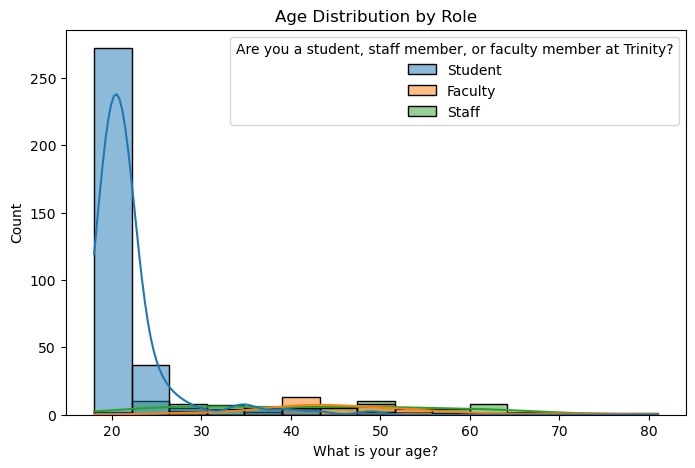

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data=data_clean, x="What is your age?", hue='Are you a student, staff member, or faculty member at Trinity?', bins=15, kde=True)
plt.title("Age Distribution by Role")
plt.show()

With this code I was able to create a histogram to show the ages of students, staff, and faculty in the dataset. The data is then divided into 15 groups. Different colors represent each role and a smooth curve shows the overall pattern. This visualization helps us understand how age and role are distributed on campus, which is important for studying wellbeing. By seeing these patterns we can explore whether factors like age or role are linked to overall wellbeing among Trinity’s students, staff, and faculty.

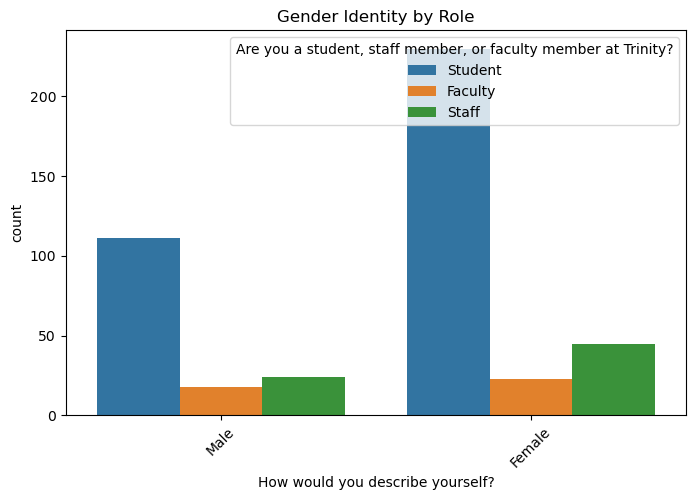

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=data_clean, x="How would you describe yourself?", hue='Are you a student, staff member, or faculty member at Trinity?')
plt.title("Gender Identity by Role")
plt.xticks(rotation=45)
plt.show()

The code above creates a bar chart showing the gender identities of students, staff, and faculty at Trinity. The x-axis shows different gender identities, and the bars show how many people are in each group. Different colors represent students, staff, and faculty. The labels are rotated so they are easier to read, and a title is added. This chart helps us see patterns in gender identity across campus roles, which may relate to overall wellbeing.

In [38]:
mh_col = [c for c in data_clean.columns if "overall mental health" in c.lower()][0]
mh_col

'How would you rate your overall mental health? \xa0\xa0'

This code finds the column in your dataset that contains **“overall mental health”** in its name and stores it in the variable **mh_col**. I can then use **mh_col** to reference that column in my analysis

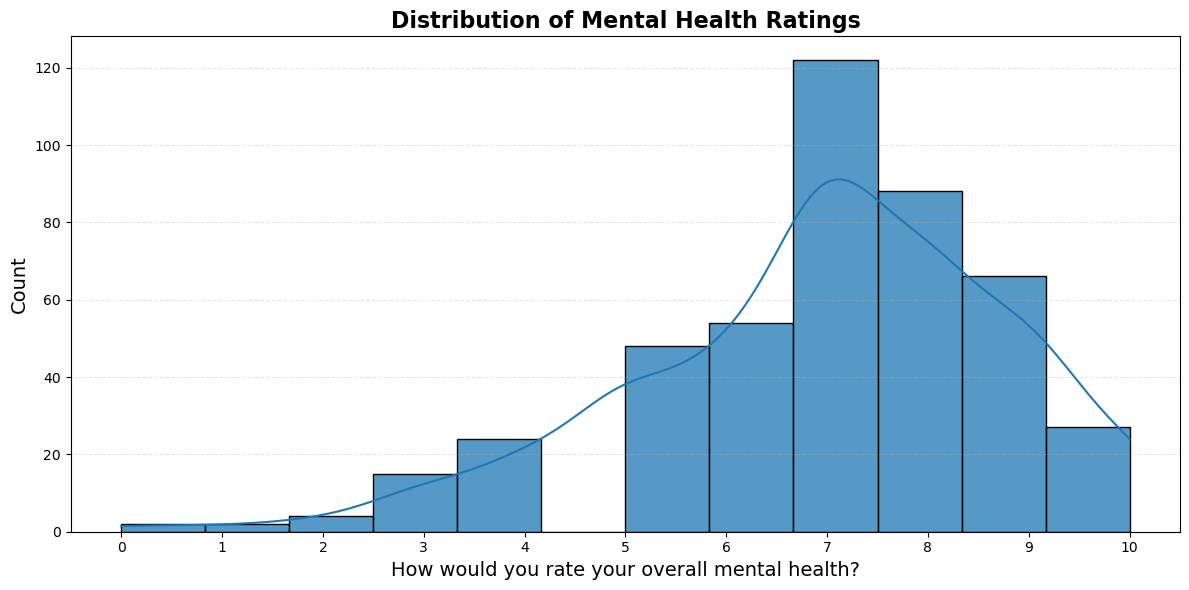

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(data_clean[mh_col], kde=True, bins=12, edgecolor='black', alpha=0.75)

plt.title("Distribution of Mental Health Ratings", fontsize=16, fontweight='bold')
plt.xlabel("How would you rate your overall mental health?", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(range(0, 11))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

This graph now shows us how students, staff, and faculty rated their overall mental health. The x-axis shows the ratings, and the y-axis shows how many people chose each rating. The smooth curve highlights the overall pattern. By looking at this, we can see which mental health ratings are most common and start to explore how mental health relates to overall wellbeing on campus.

C:\Users\ssang\AppData\Local\Temp\ipykernel_25228\2955975686.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


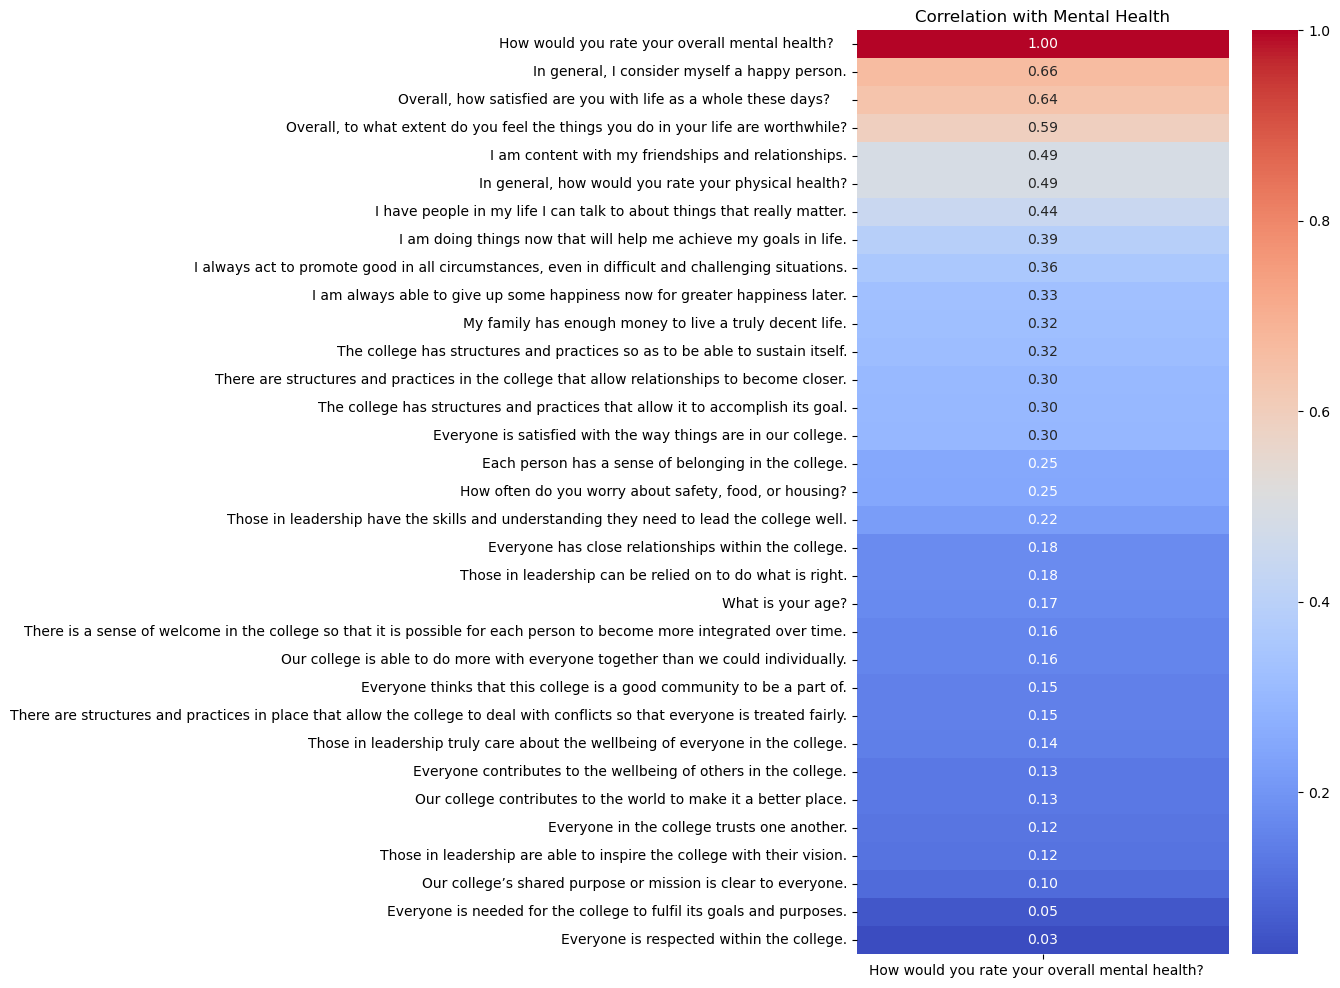

In [40]:
mh_col = [c for c in data_clean.columns if "overall mental health" in c.lower()][0]

corr = data_clean.select_dtypes(include=['float64', 'int64']).corr()

mh_corr = corr[mh_col].sort_values(ascending=False)

plt.figure(figsize=(6, 12))
sns.heatmap(
    mh_corr.to_frame(), 
    annot=True, 
    fmt=".2f",
    cmap='coolwarm'
)
plt.title("Correlation with Mental Health")
plt.tight_layout()
plt.show()

I created a heatmap to show how different numeric factors in the dataset are related to overall mental health. First it finds the column for mental health ratings and calculates correlations with all numeric columns. Then it selects and sorts the correlations for mental health. The heatmap uses colors to show the strength and direction of each correlation. Positive correlations show factors that increase with better mental health while negative correlations show factors that decrease. This chart helps us see which parts of campus life or personal characteristics are most linked to overall wellbeing for students, staff, and faculty.

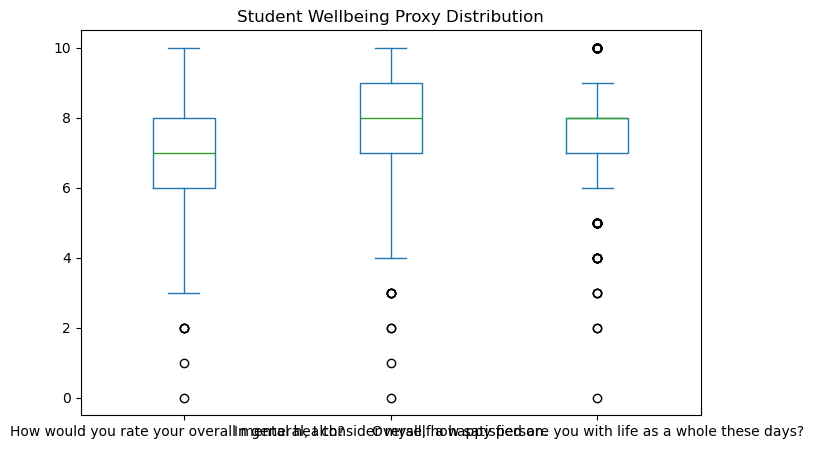

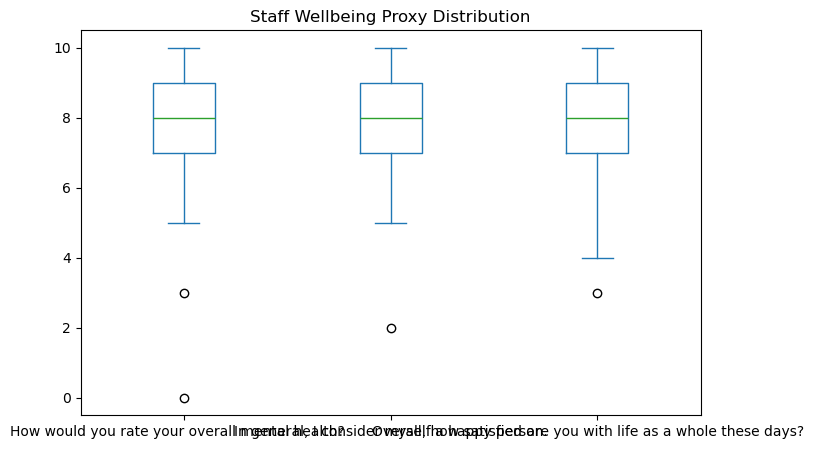

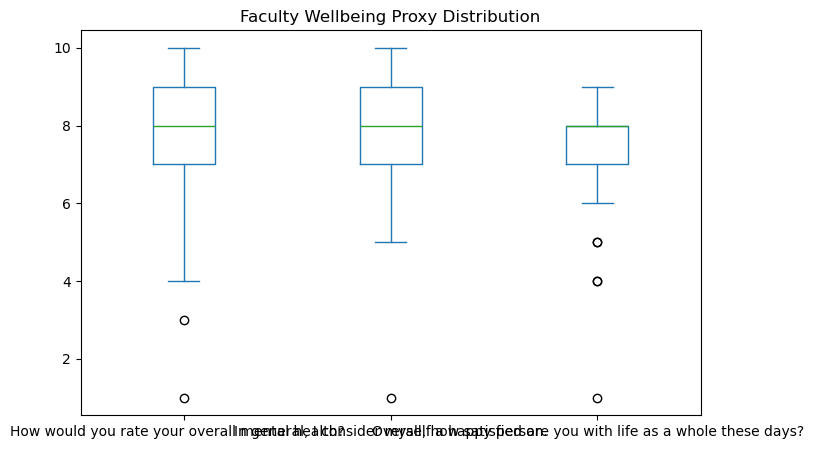

In [41]:
wellbeing_vars = [
    "How would you rate your overall mental health? \xa0\xa0",
    "In general, I consider myself a happy person.",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0"
]

for role, df in role_dfs.items():
    df[wellbeing_vars] = df[wellbeing_vars].apply(pd.to_numeric, errors='coerce')
    df[wellbeing_vars].plot(kind='box', title=f"{role} Wellbeing Proxy Distribution", figsize=(8,5))
    plt.show()

These boxplots show the wellbeing responses for students, staff, and faculty. The three questions measure overall mental health, happiness, and life satisfaction. The responses are first converted to numbers so they can be plotted. Then a boxplot is created for each role to show the range of responses, including the median, quartiles, and any outliers. These plots make it easy to compare wellbeing across groups and see patterns or differences among students, staff, and faculty.

**Correlation Analysis**

Correlation analysis shows how different variables are related to each other. A positive correlation means that when one variable goes up, the other also goes up, while a negative correlation means that when one goes up, the other goes down. A correlation near zero means there is little or no relationship. In this study, correlation analysis helps us see which campus factors, like age, stress, or lifestyle habits, are connected to overall wellbeing, mental health, or happiness, making it easier to identify important patterns.

--- Student Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.658041   
Overall, how satisfied are you with life as a w...                                           0.615046   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.658041   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.620448   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rat

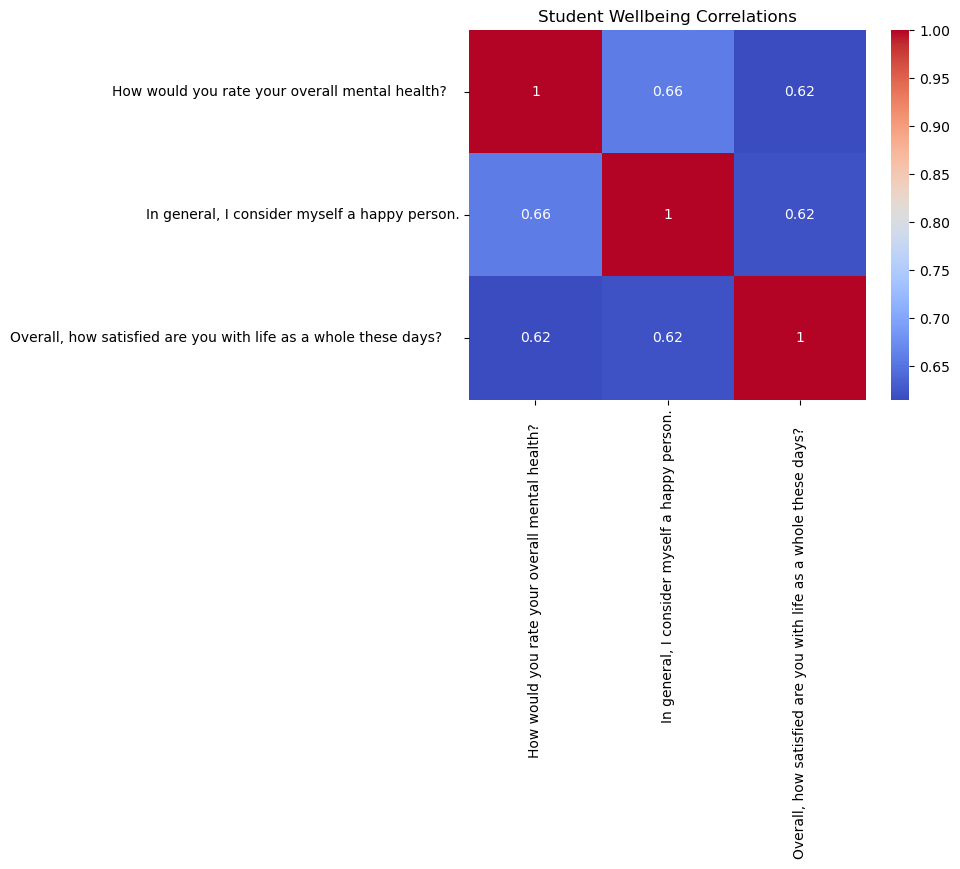

--- Staff Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.740094   
Overall, how satisfied are you with life as a w...                                           0.661310   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.740094   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.601699   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rate 

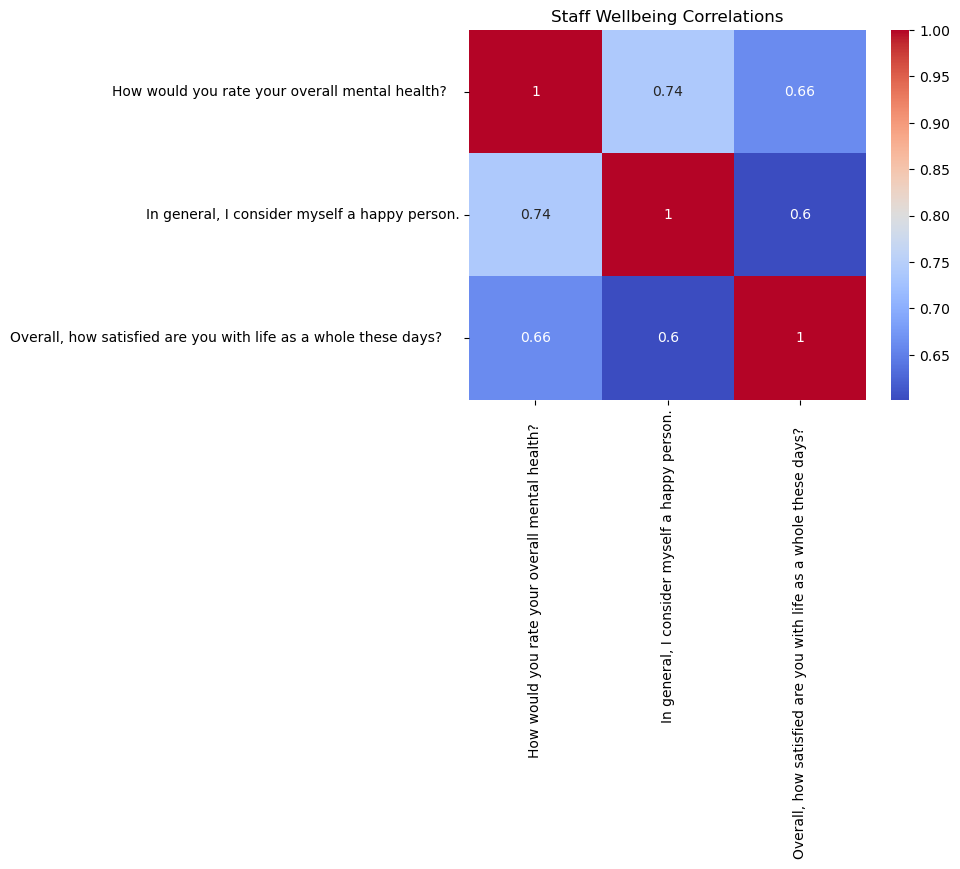

--- Faculty Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.571153   
Overall, how satisfied are you with life as a w...                                           0.762853   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.571153   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.787378   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rat

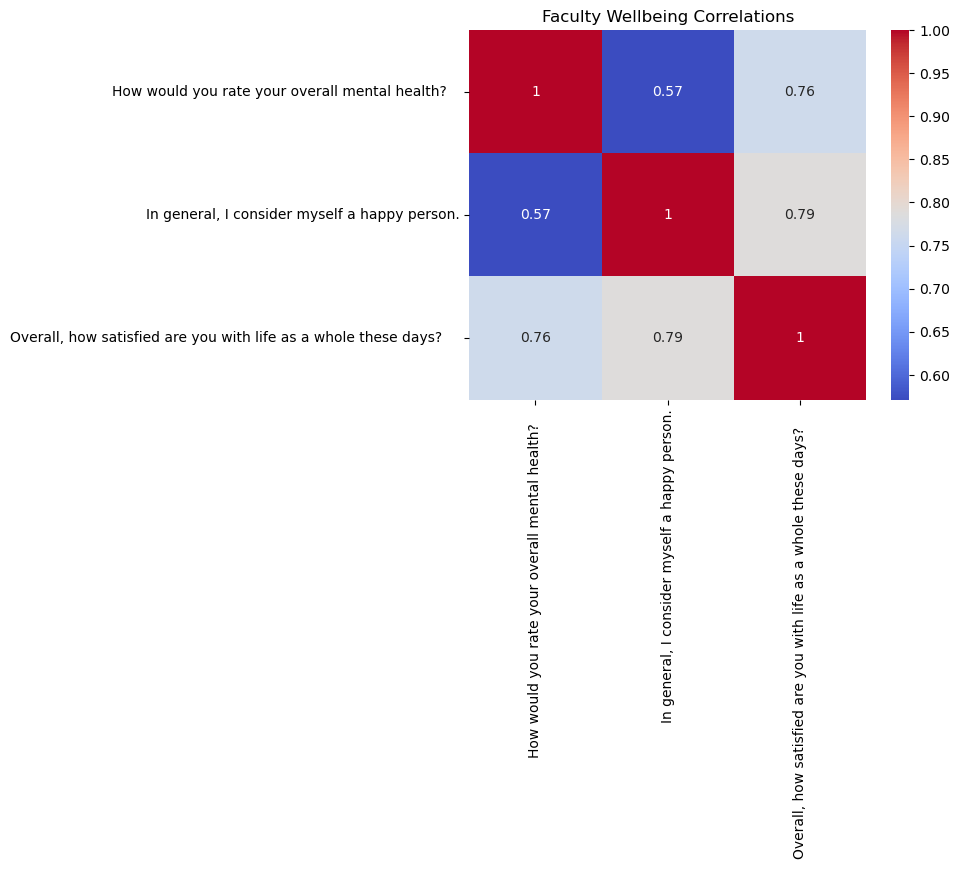

In [42]:
for role, df in role_dfs.items():
    corr = df[wellbeing_vars].corr()
    print(f"--- {role} Correlation Matrix ---")
    print(corr)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"{role} Wellbeing Correlations")
    plt.show()

This code calculates and shows the correlations between wellbeing variables for each role students, staff, and faculty. For each group it finds how strongly each variable is related to the others and prints a table of values. It also shows a heatmap with colors to make the relationships easier to see. Positive correlations mean two variables increase together while negative correlations mean one goes up as the other goes down. These charts help us compare wellbeing patterns across different roles and see which factors are connected in each group.

<span style="color: #4682B4; font-weight: bold;">Data Cleaning</span>

Data cleaning is the process of fixing data from a dataset. It checks for missing values, correcting errors and making sure the data is accurate and consistent. Clean data is important because it helps ensure that any analysis or models built from it give reliable and meaningful results.

In [43]:
data_clean = data.copy()

data_clean.columns = (
    data_clean.columns
    .str.replace('\xa0', ' ', regex=False)
    .str.strip()
)

wellbeing_vars = [
    "How would you rate your overall mental health?",
    "In general, I consider myself a happy person.",
    "Overall, how satisfied are you with life as a whole these days?"
]

data_clean[wellbeing_vars] = data_clean[wellbeing_vars].apply(
    pd.to_numeric, errors='coerce'
)

data_clean["health_index"] = data_clean[wellbeing_vars].mean(axis=1)

This code first makes a copy of the original dataset to avoid changing it. It then cleans the column names by replacing special space characters and removing extra spaces. Then it selects three questions related to wellbeing and makes sure their answers are treated as numbers. Finally it calculates a new column called **health_index** by averaging the answers to these three questions for each person, giving a single score that summarizes overall wellbeing.

<span style="color: #4682B4; font-weight: bold;">Feature Selection</span>

Feature selection is the process of choosing which variables in a dataset are most useful for building a model. Not all columns help predict the outcome and some may make the model less accurate or harder to understand. By selecting the most important features we can make the model better and easier to interpret. In this study feature selection helps identify which campus factors, like age, stress, or lifestyle habits, are most important for predicting overall wellbeing, mental health, or happiness.

**Student Data**

This code makes a clean dataset of students. It keeps only some columns, filters to just students, and removes any rows with missing values. The result is **students_clean**. 

In [44]:
columns_kept = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "In general, how would you rate your physical health?",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?",
    "health_index"
]

students_clean = data_clean[
    data_clean["Are you a student, staff member, or faculty member at Trinity?"]
        .astype(str)
        .str.strip()
        == "Student"
][columns_kept].dropna()


In [45]:
students_clean

,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"In general, how would you rate your physical health?","Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?",health_index
0,Male,22.0,An associate degree,7.0,8.0,8.0,7.0,6.0,7.0,7.0,7.0,8.0,Student,7.333333
1,Female,20.0,Some college but no degree,6.0,8.0,9.0,9.0,8.0,8.0,9.0,7.0,9.0,Student,6.333333
2,Female,19.0,Some college but no degree,9.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,10.0,Student,7.333333
3,Female,22.0,Some college but no degree,7.0,6.0,9.0,7.0,7.0,8.0,10.0,10.0,2.0,Student,7.333333
4,Male,22.0,High school diploma or equivalent,8.0,8.0,9.0,7.0,5.0,8.0,9.0,9.0,10.0,Student,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Female,20.0,High school diploma or equivalent,10.0,6.0,9.0,9.0,10.0,9.0,9.0,8.0,5.0,Student,6.333333
448,Female,19.0,High school diploma or equivalent,6.0,8.0,8.0,8.0,9.0,8.0,10.0,7.0,10.0,Student,7.000000
449,Female,20.0,Some college but no degree,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Student,8.666667
450,Female,34.0,An associate degree,6.0,9.0,10.0,10.0,10.0,10.0,10.0,8.0,6.0,Student,8.666667


**Staff/Faculty Data**

This code makes clean datasets for staff and faculty. It keeps only some columns, filters to just staff or just faculty, and removes any rows with missing values. The results are **staff_clean** and **faculty_clean**.

In [46]:
columns_kept2 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "In general, how would you rate your physical health?",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?",
    "Everyone has close relationships within the college.",
    "Everyone is respected within the college.",
    "Everyone in the college trusts one another.",
    "Everyone contributes to the wellbeing of others in the college.",
    "Those in leadership truly care about the wellbeing of everyone in the college.",
    "Those in leadership can be relied on to do what is right.",
    "Those in leadership have the skills and understanding they need to lead the college well.",
    "Those in leadership are able to inspire the college with their vision.",
    "There are structures and practices in the college that allow relationships to become closer.",
    "There are structures and practices in place that allow the college to deal with conflicts so that everyone is treated fairly.",
    "The college has structures and practices so as to be able to sustain itself.",
    "The college has structures and practices that allow it to accomplish its goal.",
    "Everyone is satisfied with the way things are in our college.",
    "Everyone thinks that this college is a good community to be a part of.",
    "Each person has a sense of belonging in the college.",
    "There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.",
    "Our college’s shared purpose or mission is clear to everyone.",
    "Our college contributes to the world to make it a better place.",
    "Everyone is needed for the college to fulfil its goals and purposes.",
    "Our college is able to do more with everyone together than we could individually.",
    "health_index"
]

staff_clean = data_clean[
    data_clean["Are you a student, staff member, or faculty member at Trinity?"]
        .astype(str)
        .str.strip()
        == "Staff"
][columns_kept2].dropna()

faculty_clean = data_clean[
    data_clean["Are you a student, staff member, or faculty member at Trinity?"]
        .astype(str)
        .str.strip()
        == "Faculty"
][columns_kept2].dropna()


In [47]:
staff_clean

,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"In general, how would you rate your physical health?","Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,...,The college has structures and practices that allow it to accomplish its goal.,Everyone is satisfied with the way things are in our college.,Everyone thinks that this college is a good community to be a part of.,Each person has a sense of belonging in the college.,There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.,Our college’s shared purpose or mission is clear to everyone.,Our college contributes to the world to make it a better place.,Everyone is needed for the college to fulfil its goals and purposes.,Our college is able to do more with everyone together than we could individually.,health_index
25,Female,57.0,A bachelor’s degree,8.0,9.0,7.0,9.0,9.0,9.0,10.0,...,4.0,4.0,4.0,4.0,4.0,5.0,7.0,9.0,9.0,8.666667
29,Female,22.0,A bachelor’s degree,10.0,10.0,9.0,8.0,9.0,9.0,10.0,...,8.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,10.000000
33,Female,35.0,A postgraduate degree (such as a master’s degr...,6.0,10.0,8.0,10.0,8.0,6.0,10.0,...,7.0,5.0,8.0,7.0,9.0,8.0,9.0,9.0,9.0,6.333333
36,Female,63.0,A bachelor’s degree,6.0,8.0,8.0,8.0,7.0,9.0,9.0,...,8.0,6.0,9.0,8.0,8.0,9.0,10.0,10.0,10.0,7.333333
38,Male,33.0,A postgraduate degree (such as a master’s degr...,7.0,8.0,7.0,8.0,7.0,7.0,9.0,...,7.0,5.0,8.0,7.0,8.0,7.0,7.0,7.0,7.0,7.333333
41,Female,48.0,A postgraduate degree (such as a master’s degr...,5.0,7.0,6.0,8.0,7.0,8.0,8.0,...,4.0,0.0,5.0,3.0,3.0,8.0,8.0,8.0,8.0,6.666667
43,Female,63.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,9.0,9.0,9.0,10.0,10.0,...,8.0,2.0,5.0,2.0,7.0,9.0,9.0,9.0,9.0,9.000000
46,Female,47.0,A bachelor’s degree,8.0,7.0,7.0,8.0,8.0,8.0,8.0,...,7.0,6.0,7.0,7.0,6.0,8.0,9.0,9.0,10.0,8.000000
48,Male,81.0,An associate degree,8.0,8.0,7.0,8.0,8.0,8.0,9.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,10.0,10.0,8.000000
52,Female,22.0,A bachelor’s degree,9.0,10.0,10.0,10.0,7.0,10.0,10.0,...,6.0,3.0,4.0,3.0,7.0,4.0,8.0,9.0,10.0,9.333333


In [48]:
faculty_clean

,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"In general, how would you rate your physical health?","Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,...,The college has structures and practices that allow it to accomplish its goal.,Everyone is satisfied with the way things are in our college.,Everyone thinks that this college is a good community to be a part of.,Each person has a sense of belonging in the college.,There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.,Our college’s shared purpose or mission is clear to everyone.,Our college contributes to the world to make it a better place.,Everyone is needed for the college to fulfil its goals and purposes.,Our college is able to do more with everyone together than we could individually.,health_index
7,Male,44.0,A postgraduate degree (such as a master’s degr...,8.0,8.0,8.0,8.0,8.0,8.0,10.0,...,6.0,4.0,3.0,1.0,1.0,6.0,6.0,8.0,8.0,6.666667
14,Female,41.0,A postgraduate degree (such as a master’s degr...,9.0,10.0,10.0,10.0,10.0,10.0,10.0,...,8.0,6.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.000000
18,Male,36.0,A postgraduate degree (such as a master’s degr...,8.0,9.0,8.0,8.0,7.0,4.0,3.0,...,4.0,2.0,6.0,6.0,8.0,9.0,7.0,8.0,9.0,7.666667
20,Male,39.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,9.0,8.0,9.0,9.0,8.0,...,3.0,0.0,3.0,2.0,7.0,6.0,8.0,7.0,6.0,8.333333
51,Male,38.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,9.0,9.0,9.0,10.0,10.0,...,3.0,0.0,3.0,5.0,7.0,0.0,8.0,8.0,8.0,5.666667
80,Female,43.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,5.0,6.0,6.0,6.0,7.0,8.0,8.0,8.0,8.0,9.000000
93,Male,44.0,A postgraduate degree (such as a master’s degr...,8.0,7.0,7.0,6.0,9.0,7.0,10.0,...,6.0,2.0,7.0,5.0,8.0,6.0,9.0,10.0,10.0,7.333333
104,Female,71.0,A postgraduate degree (such as a master’s degr...,9.0,8.0,8.0,9.0,8.0,7.0,10.0,...,8.0,5.0,7.0,6.0,7.0,7.0,9.0,9.0,9.0,7.333333
114,Female,43.0,A postgraduate degree (such as a master’s degr...,3.0,9.0,9.0,9.0,8.0,8.0,9.0,...,7.0,1.0,3.0,3.0,8.0,9.0,10.0,10.0,10.0,8.333333
148,Female,29.0,A postgraduate degree (such as a master’s degr...,0.0,2.0,6.0,9.0,8.0,0.0,1.0,...,2.0,1.0,7.0,3.0,7.0,10.0,9.0,10.0,10.0,1.000000


<span style="color: #4682B4; font-weight: bold;">Model Selection and tuning</span>

This is the process of picking the best machine learning model for a dataset and problem. After choosing a possible model you adjust their settings called hyperparameters to improve performance and make predictions more accurate. The goal is to find a model that fits the data well without being too underfitting or overfitting so it can make reliable predictions on new, unseen data.

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

target_col = "health_index"

# For students
feature_cols = [
    c for c in students_clean.columns 
    if c not in [
        target_col,
        "Are you a student, staff member, or faculty member at Trinity?"
    ]
]
X = students_clean[feature_cols].copy()
Y = students_clean[target_col].copy()

# For staff
feature_cols_staff = [
    c for c in staff_clean.columns 
    if c not in [target_col, "Are you a student, staff member, or faculty member at Trinity?"]
]
X = staff_clean[feature_cols_staff].copy()
Y = staff_clean[target_col].copy()

# For faculty
feature_cols_faculty = [
    c for c in faculty_clean.columns 
    if c not in [target_col, "Are you a student, staff member, or faculty member at Trinity?"]
]
X = faculty_clean[feature_cols_faculty].copy()
Y = faculty_clean[target_col].copy()

The code above prepares the student, staff, and faculty datasets for machine learning by separating each into features and labels. For each group, the features stored in X are all the columns the model will use to make predictions. The labels stored in Y are the values the model will try to predict in this case is **health_index**. This organizes the data so that each group is ready for training a model.

**Numeric vs Categorical columns**

In [50]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['What is your age?', 'In general, how would you rate your physical health?', 'Overall, to what extent do you feel the things you do in your life are worthwhile?', 'I am doing things now that will help me achieve my goals in life.', 'I always act to promote good in all circumstances, even in difficult and challenging situations.', 'I am always able to give up some happiness now for greater happiness later.', 'I am content with my friendships and relationships.', 'I have people in my life I can talk to about things that really matter.', 'My family has enough money to live a truly decent life.', 'How often do you worry about safety, food, or housing?', 'Everyone has close relationships within the college.', 'Everyone is respected within the college.', 'Everyone in the college trusts one another.', 'Everyone contributes to the wellbeing of others in the college.', 'Those in leadership truly care about the wellbeing of everyone in the college.', 'Those in leadership can b

Now we must identify which columns in the dataset are numeric and which are categorical. It begins to look at all the features in X, storing the numeric columns in **numeric_features** and all other columns in **categorical_features**. It then prints both lists so you can see the types of data. This helps because numeric and categorical features are processed differently.

**Preprocessor for pipeline**

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

This code now creates a preprocessor for a machine learning pipeline. It applies different transformations to numeric and categorical columns. Numeric features are scaled using StandardScaler that centers the values and adjusts them to have a standard deviation of 1. Categorical features are transformed using OneHotEncoder which turns each category into separate binary columns. 

**Train–Test Split for Model Training**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((29, 32), (8, 32))

The code **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)** splits our data into training and testing sets. X is the data with the features, and y is the target the model is trying to predict. **test_size=0.2** means 20% of the data is for testing, and 80% is for training. **random_state=42** makes sure the split is the same every time you run it. **X_train** and **y_train** are used to train the model. **X_test** and **y_test** are used to check how well the model works. Using **X_train.shape** and **X_test.shape** shows how many rows and columns are in each set.

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

try:
    from xgboost import XGBRegressor
    has_xgb = True
except ImportError:
    has_xgb = False

try:
    from lightgbm import LGBMRegressor
    has_lgbm = True
except ImportError:
    has_lgbm = False

models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
}

if has_xgb:
    models["XGBRegressor"] = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective="reg:squarederror"
    )

if has_lgbm:
    models["LGBMRegressor"] = LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )

results = {}

for name, model in models.items():
    pipe = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", model)
        ]
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5 

    results[name] = {"r2": r2, "rmse": rmse}
    print(f"=== {name} ===")
    print(f"R²:   {r2:.3f}")
    print(f"RMSE: {rmse:.3f}\n")

=== RandomForest ===
R²:   -0.176
RMSE: 1.552



This code then sets up and tests different regression models to predict a target. It first checks if XGBoost and LightGBM are installed and adds them if available. Then for each model it creates a pipeline that applies preprocessing and trains the model on the training data. After making predictions on the test data it calculates two metrics—R² which are how well the model explains the data. As well as RMSE which is how much the predictions differ from actual values. This is important because it helps you compare different models and choose the one that predicts most accurately, ensuring better decisions based on your data.

In [54]:
best_model_name = max(results, key=lambda k: results[k]["r2"])
best_model_name, results[best_model_name]


('RandomForest', {'r2': -0.1760833898305112, 'rmse': 1.552204078077366})

Now we will use this code to find the model that performs the best. It looks at the R² scores in the results dictionary and picks the model with the highest score. Then it shows the name of that model and its R² and RMSE values. 

**Hyperparameter tunining**

Hyperparameter tuning is an important step in building machine learning models. Every model has certain settings called hyperparameters that control how it learns from data.Choosing the right hyperparameters can make a big difference in how accurate and reliable your model is. Hyperparameter tuning is the process of testing different combinations of these settings to find the ones that give the best performance on your data. This helps ensure your model predicts as accurately as possible

In [57]:
from sklearn.model_selection import RandomizedSearchCV

best_base_model_name = best_model_name 
best_base_model = models[best_base_model_name]

rf_param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 3, 5, 7, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["auto", "sqrt", 0.5]
}

rf_pipe = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", best_base_model)  
    ]
)

rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_param_dist,
    n_iter=30,
    scoring="r2", 
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1
)

rf_search.fit(X_train, y_train)

print("Best params:", rf_search.best_params_)
print("Best CV R²:", rf_search.best_score_)

best_rf = rf_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned) ** 0.5 

print("\n=== Tuned Random Forest on Test Set ===")
print(f"R²:   {r2_tuned:.3f}")
print(f"RMSE: {rmse_tuned:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

<span style="color: #4682B4; font-weight: bold;">Explainability analysis</span>

Explainability analysis is the process of understanding and interpreting how a machine learning model makes its predictions. This analysis looks at which features have the most influence on the results. It helps users trust the model. This is useful when decisions affect people or important outcomes.

c:\Users\ssang\anaconda3\envs\SHAP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ssang\anaconda3\envs\SHAP\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


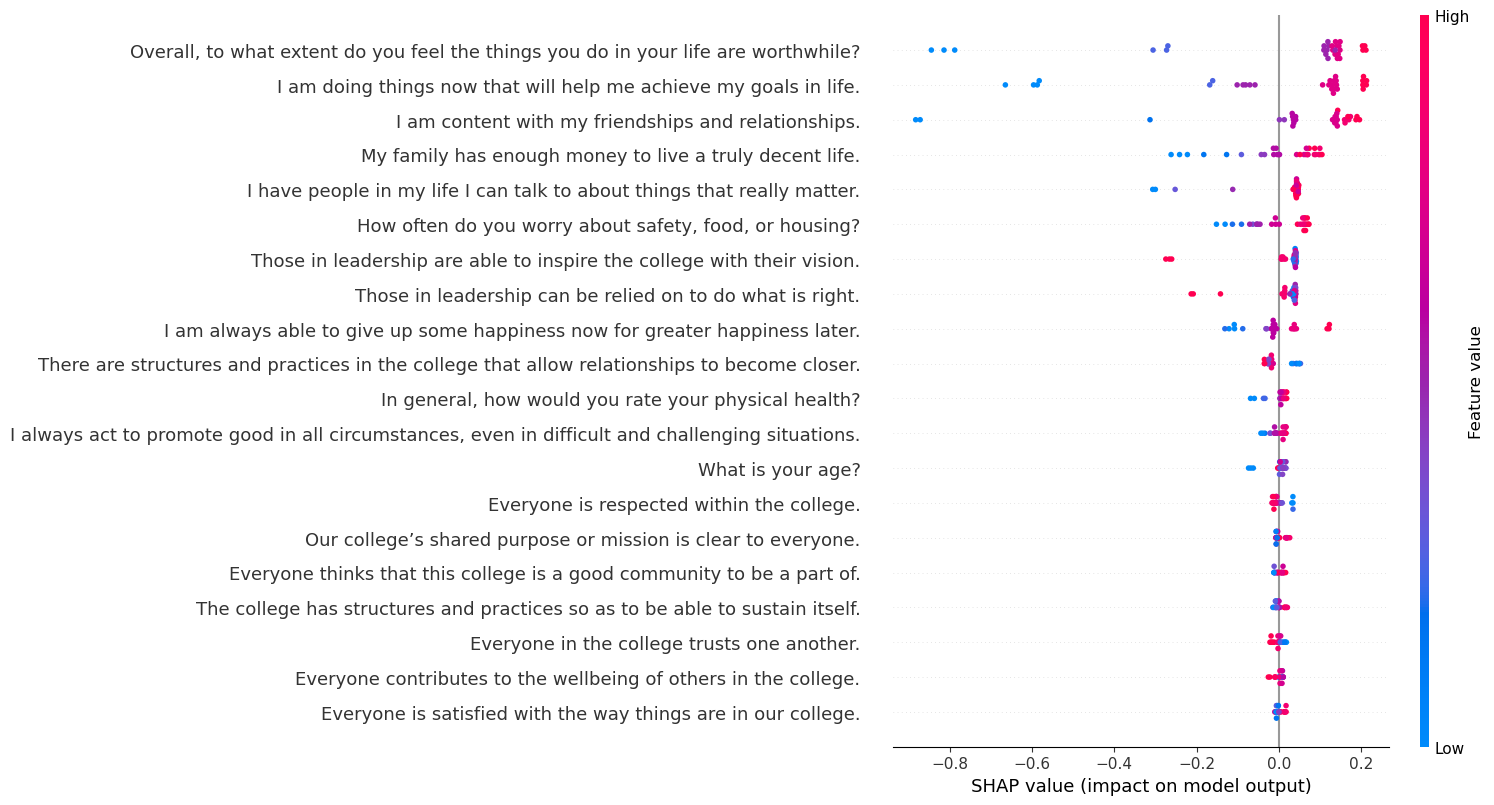

In [ ]:
import shap

X_train_processed = preprocessor.fit_transform(X_train)

rf_for_shap = best_rf.named_steps["model"] 

explainer = shap.TreeExplainer(rf_for_shap)
shap_values = explainer.shap_values(X_train_processed)

ohe = best_rf.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])

shap.summary_plot(shap_values, X_train_processed, feature_names=all_feature_names)

<span style="color: #4682B4; font-weight: bold;">Conclusion</span>